In [5]:
pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.3/148.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.8 MB/s eta 0:00:00


core           INFO 	Loading data for Australian Grand Prix - Race [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Australian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core   

Sample distance data: [2.04783554e-01 2.25416667e+00 2.66424174e+00 1.86986111e+01
 1.91105792e+01 3.84986111e+01 4.22109766e+01 5.16986111e+01
 5.54141723e+01 6.86404995e+01 8.14986111e+01 8.52423227e+01
 1.01498611e+02 1.13576387e+02 1.24831944e+02 1.28590806e+02
 1.45324988e+02 1.51587500e+02 1.73614923e+02 1.78165278e+02
 1.86831039e+02 1.94582778e+02 2.11082778e+02 2.18143315e+02
 2.30749444e+02]
Sample speed data: [293 294 295 296 296 297 297 297 297 297 298 299 300 300 300 300 300 301
 300 299 298 297 297 296 295]
Sample RPM data: [10791 10804 10825 10847 10863 10880 10882 10885 10920 10956 10992 10992
 10992 10992 10992 10992 10992 10992 10976 10960 10924 10889 10863 10842
 10821]
Sample Gear data: [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]


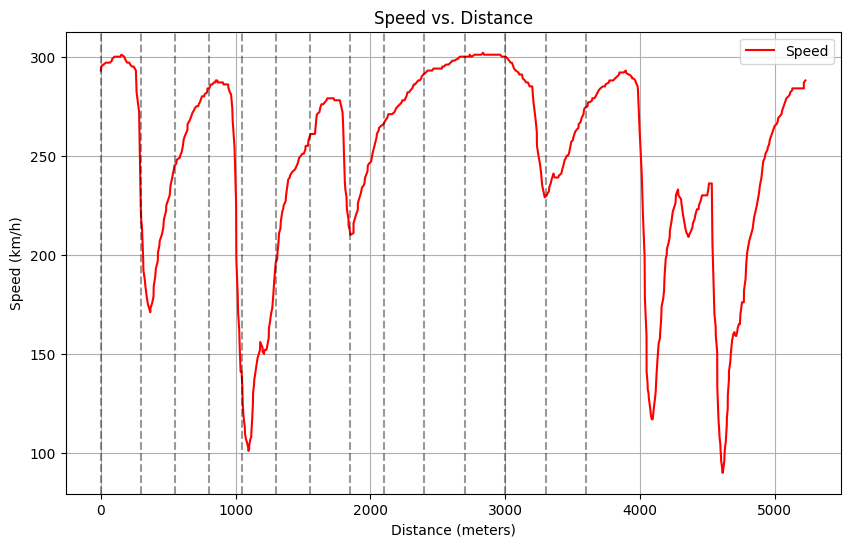

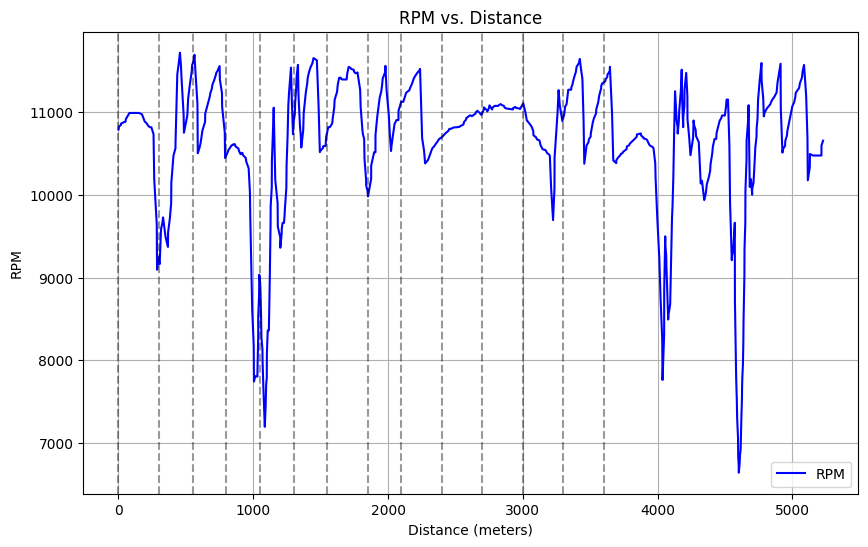

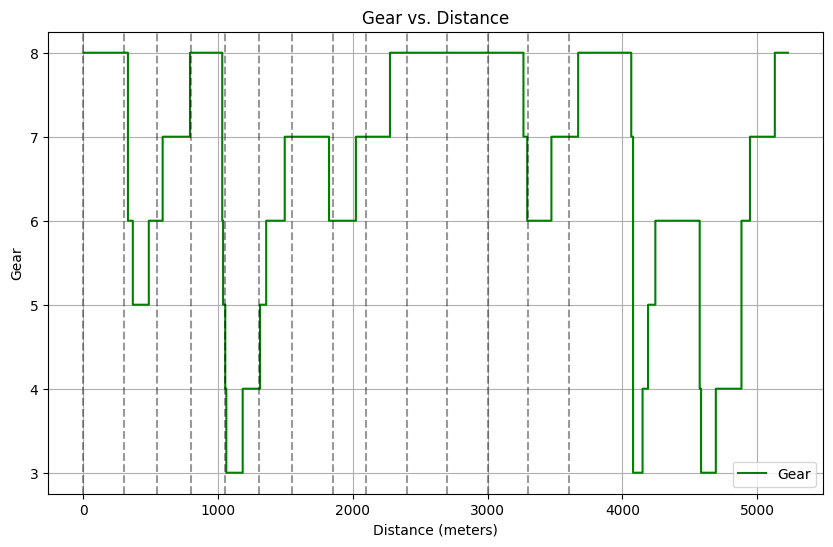

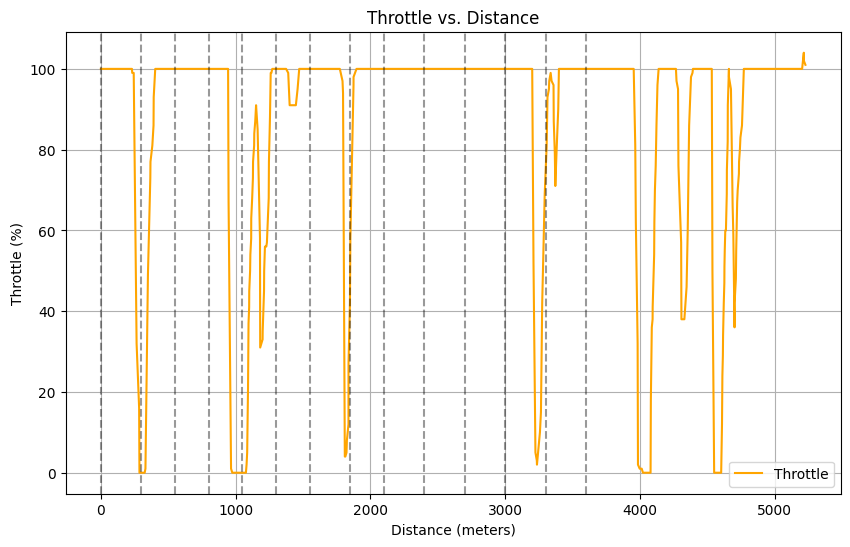

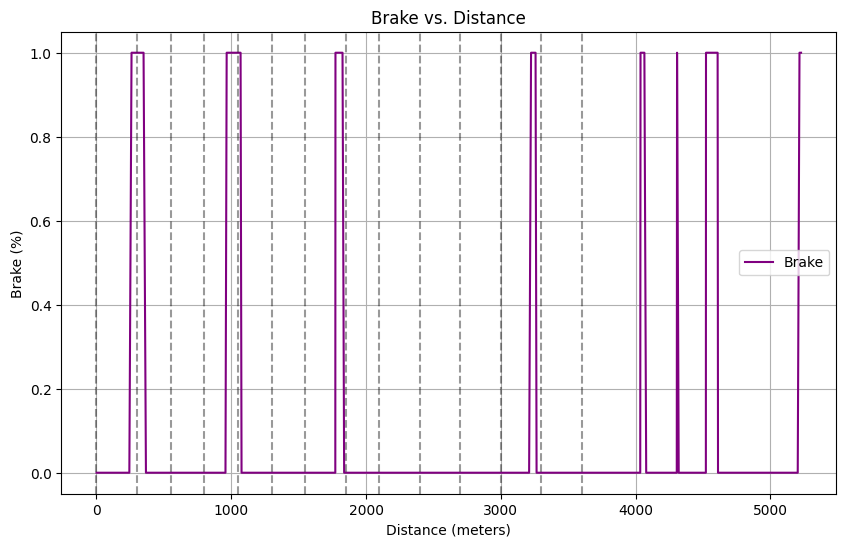

In [9]:
import fastf1 as ff1
import matplotlib.pyplot as plt
import numpy as np

session = ff1.get_session(2023, 'Australia', 'R')
session.load()
laps = session.laps.pick_driver('HAM')
lap = laps.pick_fastest()
telemetry = lap.get_telemetry()
speed = telemetry['Speed'].values
rpm = telemetry['RPM'].values
gear = telemetry['nGear'].values
throttle = telemetry['Throttle'].values
brake = telemetry['Brake'].values
distance = telemetry['Distance'].values
print("Sample distance data:", distance[:25])
print("Sample speed data:", speed[:25])
print("Sample RPM data:", rpm[:25])
print("Sample Gear data:", gear[:25])

# Australia GP
turn_positions = {
    'Turn 1 - Turn 1': 0,              # Start of the circuit
    'Turn 2 - Turn 2': 300,
    'Turn 3 - Turn 3': 550,
    'Turn 4 - Turn 4': 800,
    'Turn 5 - Turn 5': 1050,
    'Turn 6 - Turn 6': 1300,
    'Turn 7 - Turn 7': 1550,
    'Turn 8 - Turn 8': 1850,
    'Turn 9 - Turn 9': 2100,
    'Turn 10 - Turn 10': 2400,
    'Turn 11 - Turn 11': 2700,
    'Turn 12 - Turn 12': 3000,
    'Turn 13 - Turn 13': 3300,
    'Turn 14 - Turn 14': 3600,
}


# Speed
plt.figure(figsize=(10, 6))
plt.plot(distance, speed, color='red', label='Speed')
for turn, pos in turn_positions.items():
    plt.axvline(x=pos, color='black', linestyle='--', alpha=0.4)  # Reduced opacity
    if turn in ['Turn 1 - Turns 1-2', 'Turn 2 - Turn 6']:  # Highlight specific turns if needed
        plt.text(pos, max(speed), turn, rotation=90, verticalalignment='bottom', horizontalalignment='right', fontsize=9)
plt.xlabel('Distance (meters)')
plt.ylabel('Speed (km/h)')
plt.title('Speed vs. Distance')
plt.grid(True)
plt.legend()
plt.show()

# RPM
plt.figure(figsize=(10, 6))
plt.plot(distance, rpm, color='blue', label='RPM')
for turn, pos in turn_positions.items():
    plt.axvline(x=pos, color='black', linestyle='--', alpha=0.4)
    if turn in ['Turn 1 - Turns 1-2', 'Turn 2 - Turn 6']:
        plt.text(pos, max(rpm), turn, rotation=90, verticalalignment='bottom', horizontalalignment='right', fontsize=9)
plt.xlabel('Distance (meters)')
plt.ylabel('RPM')
plt.title('RPM vs. Distance')
plt.grid(True)
plt.legend()
plt.show()

# Gear
plt.figure(figsize=(10, 6))
plt.step(distance, gear, color='green', where='post', label='Gear')
for turn, pos in turn_positions.items():
    plt.axvline(x=pos, color='black', linestyle='--', alpha=0.4)
    if turn in ['Turn 1 - Turns 1-2', 'Turn 2 - Turn 6']:
        plt.text(pos, max(gear), turn, rotation=90, verticalalignment='bottom', horizontalalignment='right', fontsize=9)
plt.xlabel('Distance (meters)')
plt.ylabel('Gear')
plt.title('Gear vs. Distance')
plt.grid(True)
plt.legend()
plt.show()

# Throttle
plt.figure(figsize=(10, 6))
plt.plot(distance, throttle, color='orange', label='Throttle')
for turn, pos in turn_positions.items():
    plt.axvline(x=pos, color='black', linestyle='--', alpha=0.4)
    if turn in ['Turn 1 - Turns 1-2', 'Turn 2 - Turn 6']:
        plt.text(pos, max(throttle), turn, rotation=90, verticalalignment='bottom', horizontalalignment='right', fontsize=9)
plt.xlabel('Distance (meters)')
plt.ylabel('Throttle (%)')
plt.title('Throttle vs. Distance')
plt.grid(True)
plt.legend()
plt.show()

# Brake
plt.figure(figsize=(10, 6))
plt.plot(distance, brake, color='purple', label='Brake')
for turn, pos in turn_positions.items():
    plt.axvline(x=pos, color='black', linestyle='--', alpha=0.4)
    if turn in ['Turn 1 - Turns 1-2', 'Turn 2 - Turn 6']:
        plt.text(pos, max(brake), turn, rotation=90, verticalalignment='bottom', horizontalalignment='right', fontsize=9)
plt.xlabel('Distance (meters)')
plt.ylabel('Brake (%)')
plt.title('Brake vs. Distance')
plt.grid(True)
plt.legend()
plt.show()
